In [1]:
#!pip install seaborn
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import requests
import json
import seaborn as sns
import calendar
#from config import gkey
#from config import omdb_api_key

In [2]:
# File to Load
crime_data_to_load = "Resources/crime_09_20_clean_dupsdeleted.csv"



In [3]:
# Read  Data File and store into Pandas DataFrames
crime_data = pd.read_csv(crime_data_to_load)

#print data frame
crime_data.head()


C:\Users\betsy\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month
0,193651657,12/31/2019,1458,1388 LA FRANCE ST NE,LARCENY-NON VEHICLE,Edgewood,33.76053,-84.34220,2019,12
1,193651031,12/31/2019,1300,443 MORELAND AVE SE,LARCENY-NON VEHICLE,Ormewood Park,33.74179,-84.34973,2019,12
2,193650870,12/31/2019,1200,2711 METROPOLITAN PKWY SW,LARCENY-NON VEHICLE,Hammond Park,33.68092,-84.40814,2019,12
3,193651019,12/31/2019,1300,969 MARIETTA ST NW,LARCENY-NON VEHICLE,Marietta Street Artery,33.77828,-84.40910,2019,12
4,193651039,12/31/2019,1300,3070 BOLLING WAY NE,LARCENY-NON VEHICLE,Buckhead Village,33.83888,-84.37995,2019,12


In [4]:
#Consolidated dataframe headings to match what's going on in 2020 with robberies and burglaries

crime_data_consolidated_df = crime_data.replace(
    {"BURGLARY-NONRES": "BURGLARY", "BURGLARY-RESIDENCE": "BURGLARY", "ROBBERY-COMMERCIAL" : "ROBBERY",
     "ROBBERY-PEDESTRIAN": "ROBBERY", "ROBBERY-RESIDENCE" : "ROBBERY"})
crime_data_consolidated_df

,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month
0,193651657,12/31/2019,1458,1388 LA FRANCE ST NE,LARCENY-NON VEHICLE,Edgewood,33.76053,-84.34220,2019,12
1,193651031,12/31/2019,1300,443 MORELAND AVE SE,LARCENY-NON VEHICLE,Ormewood Park,33.74179,-84.34973,2019,12
2,193650870,12/31/2019,1200,2711 METROPOLITAN PKWY SW,LARCENY-NON VEHICLE,Hammond Park,33.68092,-84.40814,2019,12
3,193651019,12/31/2019,1300,969 MARIETTA ST NW,LARCENY-NON VEHICLE,Marietta Street Artery,33.77828,-84.40910,2019,12
4,193651039,12/31/2019,1300,3070 BOLLING WAY NE,LARCENY-NON VEHICLE,Buckhead Village,33.83888,-84.37995,2019,12
...,...,...,...,...,...,...,...,...,...,...
364243,200011298,1/1/2020,14:45,2630 MARTIN L KING JR DR SW,AUTO THEFT,Harland Terrace,33.75377,-84.47405,2020,1
364244,200011823,1/1/2020,20:00,540 HUMPHRIES ST SW,AUTO THEFT,Mechanicsville,33.73990,-84.40488,2020,1
364245,200020105,1/1/2020,21:45,1174 EUCLID AVE NE,AUTO THEFT,Inman Park,33.76553,-84.34934,2020,1
364246,200020704,1/1/2020,20:00,383 RALPH MCGILL BLVD NE,AUTO THEFT,Old Fourth Ward,33.76391,-84.37489,2020,1


In [5]:
#Get data frame for just the year 2020

crime_data_2020 = crime_data.loc[(crime_data["occur_year"] == 2020)]
crime_data_2020

,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month
342347,203660108,12/31/2020,1:15,1974 SYLVAN RD SW,AGG ASSAULT,Sylvan Hills,33.700432,-84.418128,2020,12
342348,203660240,12/31/2020,0:00,361 OLIVER ST NW,AUTO THEFT,English Avenue,33.764633,-84.415338,2020,12
342349,203660279,12/31/2020,3:50,800 WEST MARIETTA ST NW,LARCENY-NON VEHICLE,English Avenue,33.778925,-84.412613,2020,12
342350,203660299,12/31/2020,4:15,1054 RIDGE AVE SW,ROBBERY,Peoplestown,33.726336,-84.391717,2020,12
342351,203660335,12/31/2020,3:00,2284 CHESHIRE BRIDGE RD NE,LARCENY-FROM VEHICLE,Lindridge/Martin Manor,33.817488,-84.352555,2020,12
...,...,...,...,...,...,...,...,...,...,...
364243,200011298,1/1/2020,14:45,2630 MARTIN L KING JR DR SW,AUTO THEFT,Harland Terrace,33.753770,-84.474050,2020,1
364244,200011823,1/1/2020,20:00,540 HUMPHRIES ST SW,AUTO THEFT,Mechanicsville,33.739900,-84.404880,2020,1
364245,200020105,1/1/2020,21:45,1174 EUCLID AVE NE,AUTO THEFT,Inman Park,33.765530,-84.349340,2020,1
364246,200020704,1/1/2020,20:00,383 RALPH MCGILL BLVD NE,AUTO THEFT,Old Fourth Ward,33.763910,-84.374890,2020,1


In [6]:
#Get data frame for just the year 2019

crime_data_2019 = crime_data_consolidated_df.loc[(crime_data["occur_year"] == 2019)]
crime_data_2019

,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month
0,193651657,12/31/2019,1458,1388 LA FRANCE ST NE,LARCENY-NON VEHICLE,Edgewood,33.76053,-84.34220,2019,12
1,193651031,12/31/2019,1300,443 MORELAND AVE SE,LARCENY-NON VEHICLE,Ormewood Park,33.74179,-84.34973,2019,12
2,193650870,12/31/2019,1200,2711 METROPOLITAN PKWY SW,LARCENY-NON VEHICLE,Hammond Park,33.68092,-84.40814,2019,12
3,193651019,12/31/2019,1300,969 MARIETTA ST NW,LARCENY-NON VEHICLE,Marietta Street Artery,33.77828,-84.40910,2019,12
4,193651039,12/31/2019,1300,3070 BOLLING WAY NE,LARCENY-NON VEHICLE,Buckhead Village,33.83888,-84.37995,2019,12
...,...,...,...,...,...,...,...,...,...,...
24837,190040924,1/1/2019,1700,3500 PEACHTREE RD NE,LARCENY-NON VEHICLE,North Buckhead,33.85302,-84.36278,2019,1
24838,190040861,1/1/2019,1100,868 JOESEPH E BOONE,LARCENY-FROM VEHICLE,Center Hill,33.77725,-84.46072,2019,1
24839,190371588,1/1/2019,1240,2909 CAMPBELLTON RD SW,BURGLARY,Southwest,33.69869,-84.48265,2019,1
24840,190890742,1/1/2019,800,2430 CHESHIRE BRIDGE RD NE,BURGLARY,Lindridge/Martin Manor,33.82149,-84.35161,2019,1


In [7]:
#group by month 2020
crime_type = crime_data_2020.groupby("occur_month")
crime_type.head()

crime_count = crime_type["offense_id"].count()
crime_count

#crime_count.sort_values(by="occur_month")

occur_month
1     2184
2     1776
3     1574
4     1130
5     1339
6     1638
7     1625
8     1802
9     1622
10    2314
11    2430
12    2467
Name: offense_id, dtype: int64

In [8]:
#group by month 2019
crime_type_2019 = crime_data_2019.groupby("occur_month")
crime_type_2019.head()

crime_count_2019 = crime_type_2019["offense_id"].count()
crime_count_2019

occur_month
1     2012
2     1644
3     1610
4     1854
5     2336
6     2130
7     2341
8     2232
9     2169
10    2215
11    2101
12    2198
Name: offense_id, dtype: int64

In [9]:
#Convert month from numbers to actual month names 2020
crime_count = crime_count.reset_index()
crime_count
# crime_count
crime_count['occur_month'] = crime_count['occur_month'].apply(lambda x: calendar.month_abbr[x])
crime_count

,occur_month,offense_id
0,Jan,2184
1,Feb,1776
2,Mar,1574
3,Apr,1130
4,May,1339
5,Jun,1638
6,Jul,1625
7,Aug,1802
8,Sep,1622
9,Oct,2314


In [10]:
#Convert month from numbers to actual month names 2019
crime_count_2019 = crime_count_2019.reset_index()
crime_count_2019
# crime_count
crime_count_2019['occur_month'] = crime_count_2019['occur_month'].apply(lambda x: calendar.month_abbr[x])
crime_count_2019

,occur_month,offense_id
0,Jan,2012
1,Feb,1644
2,Mar,1610
3,Apr,1854
4,May,2336
5,Jun,2130
6,Jul,2341
7,Aug,2232
8,Sep,2169
9,Oct,2215


In [11]:
#Setting index as occur_month for plotting
#2020
crime_count = crime_count.reset_index()
crime_month_id = crime_count[["occur_month","offense_id"]]

#crime_count = crime_count.reset_index()
crime_month_id =  crime_month_id.set_index("occur_month")
crime_month_id

,offense_id
occur_month,
Jan,2184
Feb,1776
Mar,1574
Apr,1130
May,1339
Jun,1638
Jul,1625
Aug,1802
Sep,1622


In [12]:
#Setting index as occur_month for plotting
#2019
crime_count_2019 = crime_count_2019.reset_index()
crime_month_id_2019 = crime_count_2019[["occur_month","offense_id"]]

#crime_count = crime_count.reset_index()
crime_month_id_2019=  crime_month_id_2019.set_index("occur_month")
crime_month_id_2019

,offense_id
occur_month,
Jan,2012
Feb,1644
Mar,1610
Apr,1854
May,2336
Jun,2130
Jul,2341
Aug,2232
Sep,2169


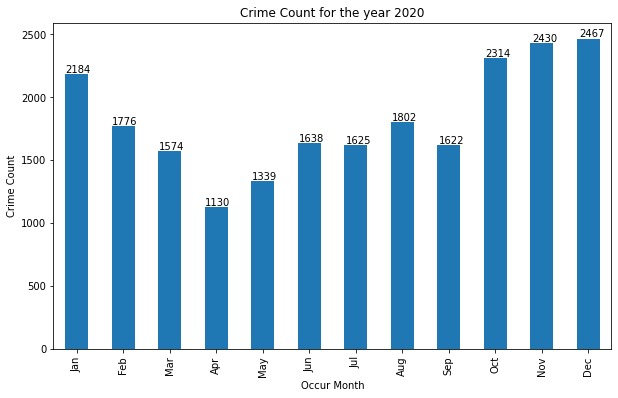

In [13]:
#Plotting bar graph for 2020
ax = crime_month_id.plot(kind="bar", figsize=(10,6),legend =False)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.title("Crime Count for the year 2020")
plt.ylabel("Crime Count")
plt.xlabel("Occur Month")

plt.show()
#plt.tight_layout()

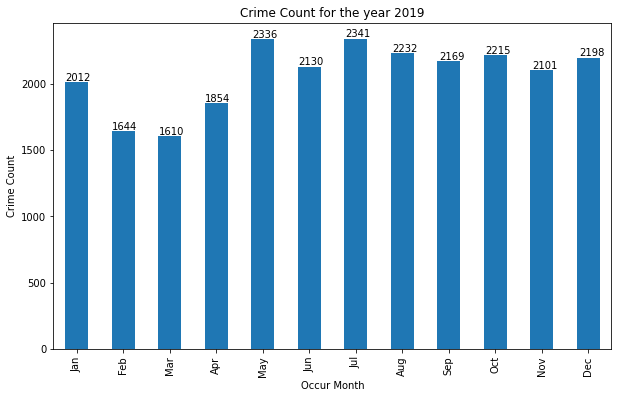

In [14]:
#Plotting bar graph for 2019
ax = crime_month_id_2019.plot(kind="bar", figsize=(10,6),legend =False)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.title("Crime Count for the year 2019")
plt.ylabel("Crime Count")
plt.xlabel("Occur Month")


plt.show()
#plt.tight_layout()

In [15]:
#Group by type 2020
crime_type = crime_data_2020.groupby(["UC2_Literal"])
crime_type.head()

#Get month data
crime_month = crime_type["offense_id"].count()
crime_month


UC2_Literal
AGG ASSAULT             2337
AUTO THEFT              3226
BURGLARY                2089
HOMICIDE                 146
LARCENY-FROM VEHICLE    8584
LARCENY-NON VEHICLE     4628
MANSLAUGHTER               2
ROBBERY                  889
Name: offense_id, dtype: int64

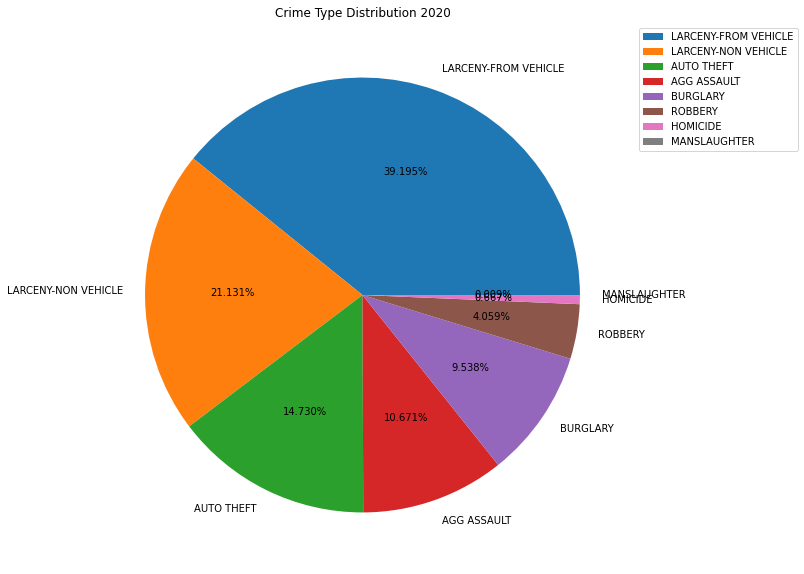

<Figure size 432x288 with 0 Axes>

In [16]:
#Pie plot for all crime types
crime_pie = crime_data_2020["UC2_Literal"].value_counts()
crime_pie

crime_pie.plot(kind="pie", autopct='%1.3f%%',legend = False,figsize=(10,10))
#crime_pie.plot(kind="pie", y = "offense_id", autopct='%1.1f%%',
              #startangle=140, shadow=True, legend = False)
#plt.axis("equal")
#Move legend
plt.legend(bbox_to_anchor= (1, 1) );
plt.title("Crime Type Distribution 2020")
plt.ylabel("")
plt.show()
plt.tight_layout()

In [17]:
#Group by type and month
crime_type_month = crime_data_2020.groupby(["occur_month","UC2_Literal"])
crime_type_group = crime_type_month["offense_id"].count()
crime_type_group

occur_month  UC2_Literal         
1            AGG ASSAULT              128
             AUTO THEFT               270
             BURGLARY                 202
             HOMICIDE                   5
             LARCENY-FROM VEHICLE     944
                                     ... 
12           BURGLARY                 161
             HOMICIDE                  16
             LARCENY-FROM VEHICLE    1177
             LARCENY-NON VEHICLE      423
             ROBBERY                   73
Name: offense_id, Length: 85, dtype: int64

In [18]:
crime_type_month_df = pd.DataFrame(crime_type_group).reset_index()
crime_type_month_df 

crime_type_month_df['occur_month'] = crime_type_month_df['occur_month'].apply(lambda x: calendar.month_abbr[x])
crime_type_month_df

,occur_month,UC2_Literal,offense_id
0,Jan,AGG ASSAULT,128
1,Jan,AUTO THEFT,270
2,Jan,BURGLARY,202
3,Jan,HOMICIDE,5
4,Jan,LARCENY-FROM VEHICLE,944
...,...,...,...
80,Dec,BURGLARY,161
81,Dec,HOMICIDE,16
82,Dec,LARCENY-FROM VEHICLE,1177
83,Dec,LARCENY-NON VEHICLE,423


Text(0.5, 0, '')

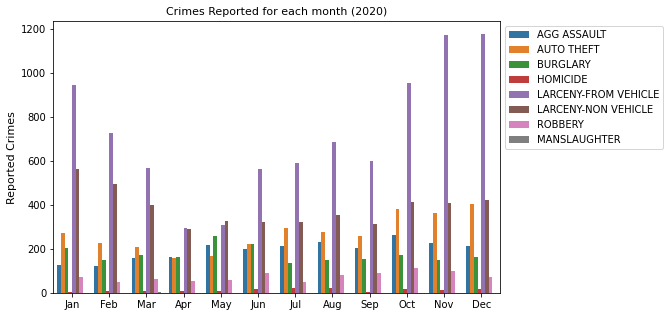

In [19]:
#Set figure size with MatPlotlib
plt.figure(figsize=(8,5))
#Plot with seaborn
sns.barplot(x = 'occur_month', y = 'offense_id', hue = 'UC2_Literal', data = crime_type_month_df)

#Move legend
plt.legend(bbox_to_anchor= (1, 1) );

#Add title and labels for each axis and set font size. 
plt.title("Crimes Reported for each month (2020)", fontsize = (11))
plt.ylabel("Reported Crimes", fontsize = (11))
plt.xlabel("")

In [20]:
#2019
#Group by type and month
crime_type_month_2019 = crime_data_2019.groupby(["occur_month","UC2_Literal"])
crime_type_group_2019 = crime_type_month_2019["offense_id"].count()
crime_type_group_2019

occur_month  UC2_Literal         
1            AGG ASSAULT             109
             AUTO THEFT              275
             BURGLARY                243
             HOMICIDE                 10
             LARCENY-FROM VEHICLE    824
                                    ... 
12           BURGLARY                217
             HOMICIDE                  6
             LARCENY-FROM VEHICLE    927
             LARCENY-NON VEHICLE     512
             ROBBERY                  85
Name: offense_id, Length: 87, dtype: int64

In [21]:
#Replacing occur_month with month names
crime_type_month_2019_df = pd.DataFrame(crime_type_group_2019).reset_index()
crime_type_month_2019_df 

crime_type_month_2019_df['occur_month'] = crime_type_month_2019_df['occur_month'].apply(lambda x: calendar.month_abbr[x])
crime_type_month_2019_df

,occur_month,UC2_Literal,offense_id
0,Jan,AGG ASSAULT,109
1,Jan,AUTO THEFT,275
2,Jan,BURGLARY,243
3,Jan,HOMICIDE,10
4,Jan,LARCENY-FROM VEHICLE,824
...,...,...,...
82,Dec,BURGLARY,217
83,Dec,HOMICIDE,6
84,Dec,LARCENY-FROM VEHICLE,927
85,Dec,LARCENY-NON VEHICLE,512


Text(0.5, 0, '')

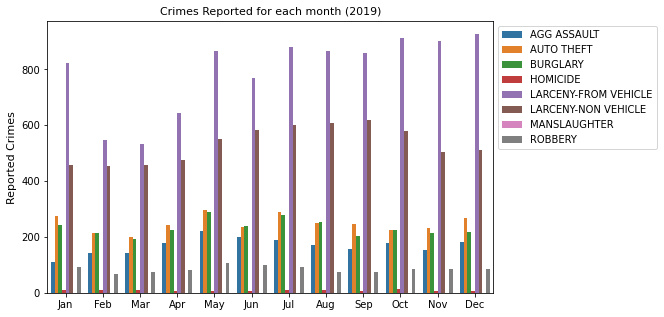

In [22]:
#Set figure size with MatPlotlib
plt.figure(figsize=(8,5))
#Plot with seaborn
sns.barplot(x = 'occur_month', y = 'offense_id', hue = 'UC2_Literal', data = crime_type_month_2019_df)

#Move legend
plt.legend(bbox_to_anchor= (1, 1) );

#Add title and labels for each axis and set font size. 
plt.title("Crimes Reported for each month (2019)", fontsize = (11))
plt.ylabel("Reported Crimes", fontsize = (11))
plt.xlabel("")

In [23]:
#Month vs Month for year 2018 - 2020
crime_2018_2020 = crime_data_consolidated_df.loc[(crime_data_consolidated_df["occur_year"] == 2018)|(crime_data_consolidated_df["occur_year"] == 2019) | (crime_data_consolidated_df["occur_year"] == 2020)]

In [24]:
#Calculate percentage change for month to month for 2018 - 2020
#Group by year for 2018,2019 and 2020 for months
crime_type_month_2019_2020 = crime_2018_2020.groupby(["occur_year","occur_month"])
crime_type_group_2019_2020 = crime_type_month_2019_2020["offense_id"].count()
#crime_type_group_2019_2020

In [25]:
#Change month number to month names
#2018-2020
crime_type_month_2019_2020_df = pd.DataFrame(crime_type_group_2019_2020).reset_index()
#crime_type_month_2019_2020_df 

crime_type_month_2019_2020_df['occur_month'] = crime_type_month_2019_2020_df['occur_month'].apply(lambda x: calendar.month_abbr[x])
#crime_type_month_2019_2020_df

In [26]:
#Create a dataframe for each month for three years 2018 - 2019
jan = crime_type_month_2019_2020_df.loc[crime_type_month_2019_2020_df["occur_month"] == "Jan"]
#jan

In [27]:
#Create a dataframe for each month for three years 2018 - 2019
feb = crime_type_month_2019_2020_df.loc[crime_type_month_2019_2020_df["occur_month"] == "Feb"]
mar = crime_type_month_2019_2020_df.loc[crime_type_month_2019_2020_df["occur_month"] == "Mar"]
apr = crime_type_month_2019_2020_df.loc[crime_type_month_2019_2020_df["occur_month"] == "Apr"]
may = crime_type_month_2019_2020_df.loc[crime_type_month_2019_2020_df["occur_month"] == "May"]
jun = crime_type_month_2019_2020_df.loc[crime_type_month_2019_2020_df["occur_month"] == "Jun"]
jul = crime_type_month_2019_2020_df.loc[crime_type_month_2019_2020_df["occur_month"] == "Jul"]
aug = crime_type_month_2019_2020_df.loc[crime_type_month_2019_2020_df["occur_month"] == "Aug"]
sep = crime_type_month_2019_2020_df.loc[crime_type_month_2019_2020_df["occur_month"] == "Sep"]
octo = crime_type_month_2019_2020_df.loc[crime_type_month_2019_2020_df["occur_month"] == "Oct"]
nov = crime_type_month_2019_2020_df.loc[crime_type_month_2019_2020_df["occur_month"] == "Nov"]
dec = crime_type_month_2019_2020_df.loc[crime_type_month_2019_2020_df["occur_month"] == "Dec"]

In [28]:
#Drop the percent change column if it already exist
#jan = jan.drop(["Percent Change"],axis=1)
#feb = feb.drop(["Percent Change"],axis=1)
#mar = mar.drop(["Percent Change"],axis=1)
#apr = apr.drop(["Percent Change"],axis=1)
#may = may.drop(["Percent Change"],axis=1)
#jun = jun.drop(["Percent Change"],axis=1)
#jul = jul.drop(["Percent Change"],axis=1)
#aug = aug.drop(["Percent Change"],axis=1)
#sep = sep.drop(["Percent Change"],axis=1)
#octo = octo.drop(["Percent Change"],axis=1)
#nov = nov.drop(["Percent Change"],axis=1)
#dec = dec.drop(["Percent Change"],axis=1)

In [29]:
#jan

In [30]:
#Using Kelly's code
#Make a loop to calculate the percent change month to montj

#Set variable for the column for easier navigation
number_crimes = jan["offense_id"]

#Set an empty list to collect the percent changes
jan_percent_change = []
feb_percent_change = []
mar_percent_change = []
apr_percent_change = []
may_percent_change = []
jun_percent_change = []
jul_percent_change = []
aug_percent_change = []
sep_percent_change = []
oct_percent_change = []
nov_percent_change = []
dec_percent_change = []

#Loop through based on the column length
for i in range(len(number_crimes)):
    
    #First number in the list will be zero, since there is no percent change for the first year
    if i==0:
        jan_percent_change.append(0)
        feb_percent_change.append(0)
        mar_percent_change.append(0)
        apr_percent_change.append(0)
        jun_percent_change.append(0)
        jul_percent_change.append(0)
        may_percent_change.append(0)
        aug_percent_change.append(0)
        sep_percent_change.append(0)
        oct_percent_change.append(0)
        nov_percent_change.append(0)
        dec_percent_change.append(0)
    
    #Locate next row down, subtract previous row, divide by previous row and multiply by 100. Append list with calculations
    #Needs to stop at 2nd to last row
    if i <= (len(number_crimes)-2):
        jan_percent = (((jan.iloc[(i+1),2] - jan.iloc[i,2])/jan.iloc[i,2] * 100))
        jan_percent_change.append(jan_percent)
        
        feb_percent = (((feb.iloc[(i+1),2] - feb.iloc[i,2])/feb.iloc[i,2] * 100))
        feb_percent_change.append(feb_percent)
        
        mar_percent = (((mar.iloc[(i+1),2] - mar.iloc[i,2])/mar.iloc[i,2] * 100))
        mar_percent_change.append(mar_percent)
        
        apr_percent = (((apr.iloc[(i+1),2] - apr.iloc[i,2])/apr.iloc[i,2] * 100))
        apr_percent_change.append(apr_percent)
        
        may_percent = (((may.iloc[(i+1),2] - may.iloc[i,2])/may.iloc[i,2] * 100))
        may_percent_change.append(may_percent)
        
        jun_percent = (((jun.iloc[(i+1),2] - jun.iloc[i,2])/jun.iloc[i,2] * 100))
        jun_percent_change.append(jun_percent)
        
        jul_percent = (((jul.iloc[(i+1),2] - jul.iloc[i,2])/jul.iloc[i,2] * 100))
        jul_percent_change.append(jul_percent)
        
        aug_percent = (((aug.iloc[(i+1),2] - aug.iloc[i,2])/jul.iloc[i,2] * 100))
        aug_percent_change.append(aug_percent)
        
        sep_percent = (((sep.iloc[(i+1),2] - sep.iloc[i,2])/sep.iloc[i,2] * 100))
        sep_percent_change.append(sep_percent)
        
        oct_percent = (((octo.iloc[(i+1),2] - octo.iloc[i,2])/octo.iloc[i,2] * 100))
        oct_percent_change.append(oct_percent)
        
        nov_percent = (((nov.iloc[(i+1),2] - nov.iloc[i,2])/nov.iloc[i,2] * 100))
        nov_percent_change.append(nov_percent)
        
        dec_percent = (((dec.iloc[(i+1),2] - dec.iloc[i,2])/dec.iloc[i,2] * 100))
        dec_percent_change.append(dec_percent)
        
        

#Add the percentage column to the dataframe
jan.insert(3, "Percent Change", jan_percent_change)
feb.insert(3, "Percent Change", feb_percent_change)
mar.insert(3, "Percent Change", mar_percent_change)
apr.insert(3, "Percent Change", apr_percent_change)
may.insert(3, "Percent Change", may_percent_change)
jun.insert(3, "Percent Change", jun_percent_change)
jul.insert(3, "Percent Change", jul_percent_change)
aug.insert(3, "Percent Change", aug_percent_change)
sep.insert(3, "Percent Change", sep_percent_change)
octo.insert(3, "Percent Change", oct_percent_change)
nov.insert(3, "Percent Change", nov_percent_change)
dec.insert(3, "Percent Change", dec_percent_change)

#Change the percent column to numeric
jan["Percent Change"] = pd.to_numeric(jan["Percent Change"])
feb["Percent Change"] = pd.to_numeric(feb["Percent Change"])
mar["Percent Change"] = pd.to_numeric(mar["Percent Change"])
apr["Percent Change"] = pd.to_numeric(apr["Percent Change"])
may["Percent Change"] = pd.to_numeric(may["Percent Change"])
jun["Percent Change"] = pd.to_numeric(jun["Percent Change"])
jul["Percent Change"] = pd.to_numeric(jul["Percent Change"])
aug["Percent Change"] = pd.to_numeric(aug["Percent Change"])
sep["Percent Change"] = pd.to_numeric(sep["Percent Change"])
octo["Percent Change"] = pd.to_numeric(octo["Percent Change"])
nov["Percent Change"] = pd.to_numeric(nov["Percent Change"])
dec["Percent Change"] = pd.to_numeric(dec["Percent Change"])


#Take the absolule value to get rid of negative numbers
#percent_change_year_counts_df["Non-Violent Percent Change"] = percent_change_year_counts_df["Non-Violent Percent Change"].abs()

#Format the percentage column
jan["Percent Change"] = jan["Percent Change"].map("{:,.2f}%".format)
feb["Percent Change"] = feb["Percent Change"].map("{:,.2f}%".format)
mar["Percent Change"] = mar["Percent Change"].map("{:,.2f}%".format)
apr["Percent Change"] = apr["Percent Change"].map("{:,.2f}%".format)
may["Percent Change"] = may["Percent Change"].map("{:,.2f}%".format)
jun["Percent Change"] = jun["Percent Change"].map("{:,.2f}%".format)
jul["Percent Change"] = jul["Percent Change"].map("{:,.2f}%".format)
aug["Percent Change"] = aug["Percent Change"].map("{:,.2f}%".format)
sep["Percent Change"] = sep["Percent Change"].map("{:,.2f}%".format)
octo["Percent Change"] = octo["Percent Change"].map("{:,.2f}%".format)
nov["Percent Change"] = nov["Percent Change"].map("{:,.2f}%".format)
dec["Percent Change"] = dec["Percent Change"].map("{:,.2f}%".format)
#percent_change_year_counts_df["Non-Violent Percent Change"] = percent_change_year_counts_df["Non-Violent Percent Change"].map("{:,.0f}%".format)

#Display the new df


C:\Users\betsy\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\betsy\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\betsy\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [31]:
#Append the dataframe for months april,may and june
apr_may = apr.append(may)
apr_may
apr_may_jun = apr_may.append(jun)
apr_may_jun

,occur_year,occur_month,offense_id,Percent Change
3,2018,Apr,1971,0.00%
15,2019,Apr,1854,-5.94%
27,2020,Apr,1130,-39.05%
4,2018,May,2263,0.00%
16,2019,May,2336,3.23%
28,2020,May,1339,-42.68%
5,2018,Jun,2184,0.00%
17,2019,Jun,2130,-2.47%
29,2020,Jun,1638,-23.10%


In [32]:
#Reset index and drop the column index
apr_may_jun_df = pd.DataFrame(apr_may_jun).reset_index()
apr_may_jun_df = apr_may_jun_df.drop(["index"],axis=1)
apr_may_jun_df

,occur_year,occur_month,offense_id,Percent Change
0,2018,Apr,1971,0.00%
1,2019,Apr,1854,-5.94%
2,2020,Apr,1130,-39.05%
3,2018,May,2263,0.00%
4,2019,May,2336,3.23%
5,2020,May,1339,-42.68%
6,2018,Jun,2184,0.00%
7,2019,Jun,2130,-2.47%
8,2020,Jun,1638,-23.10%


In [33]:
#Drop empty rows for 2018
apr_may_jun_df.drop([0, 3,6])

,occur_year,occur_month,offense_id,Percent Change
1,2019,Apr,1854,-5.94%
2,2020,Apr,1130,-39.05%
4,2019,May,2336,3.23%
5,2020,May,1339,-42.68%
7,2019,Jun,2130,-2.47%
8,2020,Jun,1638,-23.10%


In [34]:
#Append the dataframe for months oct,nov and dec
oct_nov = octo.append(nov)
oct_nov_dec = oct_nov.append(dec)
oct_nov_dec = oct_nov_dec.reset_index()

In [35]:
#Drop empty rows for 2018
#oct_nov_dec = oct_nov_dec.drop(["index"],axis=1)
oct_nov_dec.drop([0, 3,6])


,index,occur_year,occur_month,offense_id,Percent Change
1,21,2019,Oct,2215,2.03%
2,33,2020,Oct,2314,4.47%
4,22,2019,Nov,2101,-2.96%
5,34,2020,Nov,2430,15.66%
7,23,2019,Dec,2198,-9.17%
8,35,2020,Dec,2467,12.24%


Text(0.5, 0, '')

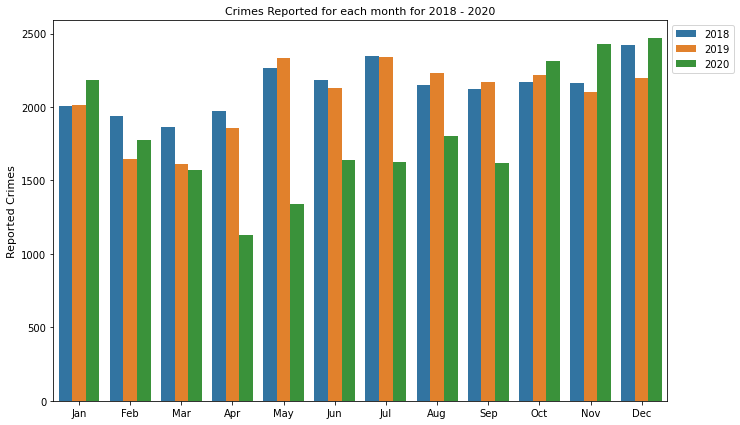

In [36]:
#Plotting month to month for years 2019-2020

#Set figure size with MatPlotlib
plt.figure(figsize=(11,7))
#Plot with seaborn
a = sns.barplot(x = 'occur_month', y = 'offense_id', hue = 'occur_year', data = crime_type_month_2019_2020_df)
# for p in a.patches:
#     a.annotate(format(p.get_height(), '.0f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 9), 
#                    textcoords = 'offset points')

#Move legend
plt.legend(bbox_to_anchor= (1, 1) );

#Add title and labels for each axis and set font size. 
plt.title("Crimes Reported for each month for 2018 - 2020", fontsize = (11))
plt.ylabel("Reported Crimes", fontsize = (11))
plt.xlabel("")

In [37]:
# Stats for the all years
#group by year and crime type

year_crime_type = crime_data_consolidated_df.groupby(["occur_year","UC2_Literal"])["offense_id"].count()
year_crime_type

year_crime = crime_data_consolidated_df.groupby(["occur_year"])["offense_id"].count()
year_crime

occur_year
2009    39297
2010    35501
2011    34833
2012    33370
2013    32389
2014    31104
2015    30046
2016    28986
2017    26373
2018    25606
2019    24842
2020    21901
Name: offense_id, dtype: int64

In [38]:
crime_type_percent = (year_crime_type/year_crime)*100


In [39]:
df = pd.DataFrame(crime_type_percent)
df

offense_id
occur_year UC2_Literal                     
2009       AGG ASSAULT             6.588289
           AUTO THEFT             14.306436
           BURGLARY               23.093366
           HOMICIDE                0.195944
           LARCENY-FROM VEHICLE   27.905438
...                                     ...
2020       HOMICIDE                0.666636
           LARCENY-FROM VEHICLE   39.194557
           LARCENY-NON VEHICLE    21.131455
           MANSLAUGHTER            0.009132
           ROBBERY                 4.059175

[86 rows x 1 columns]

In [40]:
#Need to refactor code here
#Adding a column for Crime Type to cateogrize crimes into violent and non violent
crime_2018_2020.loc[crime_2018_2020['UC2_Literal'] == 'LARCENY-NON VEHICLE','Crime Type'] = "Non-Violent"
crime_2018_2020.loc[crime_2018_2020['UC2_Literal'] == 'AUTO THEFT','Crime Type'] = "Non-Violent"
crime_2018_2020.loc[crime_2018_2020['UC2_Literal'] == 'BURGLARY','Crime Type'] = "Non-Violent"
crime_2018_2020.loc[crime_2018_2020['UC2_Literal'] == 'LARCENY-FROM VEHICLE','Crime Type'] = "Non-Violent"
crime_2018_2020.loc[crime_2018_2020['UC2_Literal'] == 'AGG ASSAULT','Crime Type'] = "Violent"
crime_2018_2020.loc[crime_2018_2020['UC2_Literal'] == 'MANSLAUGHTER','Crime Type'] = "Violent"
crime_2018_2020.loc[crime_2018_2020['UC2_Literal'] == 'HOMICIDE','Crime Type'] = "Violent"
crime_2018_2020.loc[crime_2018_2020['UC2_Literal'] == 'ROBBERY','Crime Type'] = "Violent"
crime_2018_2020

C:\Users\betsy\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\betsy\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month,Crime Type
0,193651657,12/31/2019,1458,1388 LA FRANCE ST NE,LARCENY-NON VEHICLE,Edgewood,33.76053,-84.34220,2019,12,Non-Violent
1,193651031,12/31/2019,1300,443 MORELAND AVE SE,LARCENY-NON VEHICLE,Ormewood Park,33.74179,-84.34973,2019,12,Non-Violent
2,193650870,12/31/2019,1200,2711 METROPOLITAN PKWY SW,LARCENY-NON VEHICLE,Hammond Park,33.68092,-84.40814,2019,12,Non-Violent
3,193651019,12/31/2019,1300,969 MARIETTA ST NW,LARCENY-NON VEHICLE,Marietta Street Artery,33.77828,-84.40910,2019,12,Non-Violent
4,193651039,12/31/2019,1300,3070 BOLLING WAY NE,LARCENY-NON VEHICLE,Buckhead Village,33.83888,-84.37995,2019,12,Non-Violent
...,...,...,...,...,...,...,...,...,...,...,...
364243,200011298,1/1/2020,14:45,2630 MARTIN L KING JR DR SW,AUTO THEFT,Harland Terrace,33.75377,-84.47405,2020,1,Non-Violent
364244,200011823,1/1/2020,20:00,540 HUMPHRIES ST SW,AUTO THEFT,Mechanicsville,33.73990,-84.40488,2020,1,Non-Violent
364245,200020105,1/1/2020,21:45,1174 EUCLID AVE NE,AUTO THEFT,Inman Park,33.76553,-84.34934,2020,1,Non-Violent
364246,200020704,1/1/2020,20:00,383 RALPH MCGILL BLVD NE,AUTO THEFT,Old Fourth Ward,33.76391,-84.37489,2020,1,Non-Violent


In [41]:
#Group by crime type 2020
crime_data_2020_month_type = crime_2018_2020.loc[(crime_data["occur_year"] == 2020)]
crime_data_2020_month_type

crime_type_month_2020 = crime_data_2020_month_type.groupby(["occur_month","Crime Type"])
crime_type_group_2020 = crime_type_month_2020["offense_id"].count()
crime_type_group_2020

occur_month  Crime Type 
1            Non-Violent    1979
             Violent         205
2            Non-Violent    1601
             Violent         175
3            Non-Violent    1341
             Violent         233
4            Non-Violent     905
             Violent         225
5            Non-Violent    1057
             Violent         282
6            Non-Violent    1331
             Violent         307
7            Non-Violent    1342
             Violent         283
8            Non-Violent    1469
             Violent         333
9            Non-Violent    1322
             Violent         300
10           Non-Violent    1922
             Violent         392
11           Non-Violent    2095
             Violent         335
12           Non-Violent    2163
             Violent         304
Name: offense_id, dtype: int64

In [42]:
#Create a dataframe and convert month numbers to month names
crime_type_group_2020_df = pd.DataFrame(crime_type_group_2020).reset_index()
crime_type_group_2020_df

crime_type_group_2020_df['occur_month'] = crime_type_group_2020_df['occur_month'].apply(lambda x: calendar.month_abbr[x])
crime_type_group_2020_df

,occur_month,Crime Type,offense_id
0,Jan,Non-Violent,1979
1,Jan,Violent,205
2,Feb,Non-Violent,1601
3,Feb,Violent,175
4,Mar,Non-Violent,1341
5,Mar,Violent,233
6,Apr,Non-Violent,905
7,Apr,Violent,225
8,May,Non-Violent,1057
9,May,Violent,282


Text(0.5, 0, '')

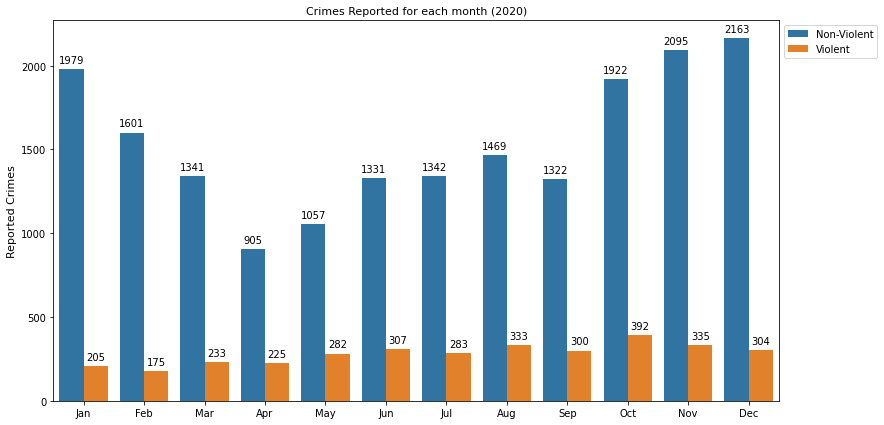

In [43]:
#Set figure size with MatPlotlib
plt.figure(figsize=(13,7))
#Plot with seaborn
g = sns.barplot(x = 'occur_month', y = 'offense_id', hue = 'Crime Type', data = crime_type_group_2020_df)
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
#Move legend
plt.legend(bbox_to_anchor= (1, 1) );

#Add title and labels for each axis and set font size. 
plt.title("Crimes Reported for each month (2020)", fontsize = (11))
plt.ylabel("Reported Crimes", fontsize = (11))
plt.xlabel("")

In [44]:
#Group by type 2019
crime_data_2019_month_type = crime_2018_2020.loc[(crime_data["occur_year"] == 2019)]
crime_data_2019_month_type

crime_type_month_2019 = crime_data_2019_month_type.groupby(["occur_month","Crime Type"])
crime_type_group_2019 = crime_type_month_2019["offense_id"].count()
crime_type_group_2019

occur_month  Crime Type 
1            Non-Violent    1798
             Violent         214
2            Non-Violent    1427
             Violent         217
3            Non-Violent    1381
             Violent         229
4            Non-Violent    1586
             Violent         268
5            Non-Violent    2001
             Violent         335
6            Non-Violent    1824
             Violent         306
7            Non-Violent    2049
             Violent         292
8            Non-Violent    1977
             Violent         255
9            Non-Violent    1929
             Violent         240
10           Non-Violent    1942
             Violent         273
11           Non-Violent    1851
             Violent         250
12           Non-Violent    1924
             Violent         274
Name: offense_id, dtype: int64

In [45]:
#Create a dataframe and convert month numbers to month names
crime_type_group_2019_df = pd.DataFrame(crime_type_group_2019).reset_index()
crime_type_group_2019_df

crime_type_group_2019_df['occur_month'] = crime_type_group_2019_df['occur_month'].apply(lambda x: calendar.month_abbr[x])
crime_type_group_2019_df

,occur_month,Crime Type,offense_id
0,Jan,Non-Violent,1798
1,Jan,Violent,214
2,Feb,Non-Violent,1427
3,Feb,Violent,217
4,Mar,Non-Violent,1381
5,Mar,Violent,229
6,Apr,Non-Violent,1586
7,Apr,Violent,268
8,May,Non-Violent,2001
9,May,Violent,335


Text(0.5, 0, '')

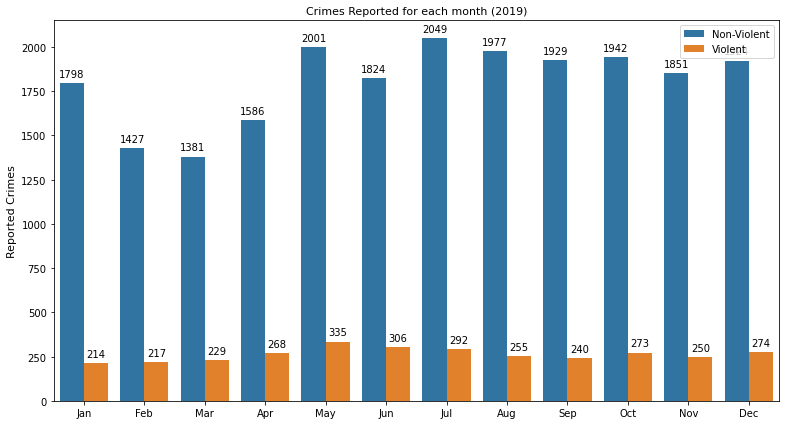

In [46]:
#Set figure size with MatPlotlib
plt.figure(figsize=(13,7))
#Plot with seaborn
g = sns.barplot(x = 'occur_month', y = 'offense_id', hue = 'Crime Type', data = crime_type_group_2019_df)
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
#Move legend
plt.legend(bbox_to_anchor= (1, 1) );

#Add title and labels for each axis and set font size. 
plt.title("Crimes Reported for each month (2019)", fontsize = (11))
plt.ylabel("Reported Crimes", fontsize = (11))
plt.xlabel("")
     

In [47]:
# Combine Violent and non violent crimes for threee years
group_by_year_month = crime_2018_2020.groupby(["occur_year","occur_month"])

#get count for violent and non violent
crime_type_group = group_by_year_month["Crime Type"].value_counts()
crime_type_group

occur_year  occur_month  Crime Type 
2018        1            Non-Violent    1784
                         Violent         224
            2            Non-Violent    1700
                         Violent         238
            3            Non-Violent    1622
                                        ... 
2020        10           Violent         392
            11           Non-Violent    2095
                         Violent         335
            12           Non-Violent    2163
                         Violent         304
Name: Crime Type, Length: 72, dtype: int64

In [48]:
crime_2017_2020 = crime_data_consolidated_df.loc[(crime_data_consolidated_df["occur_year"] == 2017)|(crime_data_consolidated_df["occur_year"] == 2018)|(crime_data_consolidated_df["occur_year"] == 2019) | (crime_data_consolidated_df["occur_year"] == 2020)]
#crime_2017_2020
crime_2017_2020.loc[crime_2017_2020['UC2_Literal'] == 'LARCENY-NON VEHICLE','Crime Type'] = "Non-Violent"
crime_2017_2020.loc[crime_2017_2020['UC2_Literal'] == 'AUTO THEFT','Crime Type'] = "Non-Violent"
crime_2017_2020.loc[crime_2017_2020['UC2_Literal'] == 'BURGLARY','Crime Type'] = "Non-Violent"
crime_2017_2020.loc[crime_2017_2020['UC2_Literal'] == 'LARCENY-FROM VEHICLE','Crime Type'] = "Non-Violent"
crime_2017_2020.loc[crime_2017_2020['UC2_Literal'] == 'AGG ASSAULT','Crime Type'] = "Violent"
crime_2017_2020.loc[crime_2017_2020['UC2_Literal'] == 'MANSLAUGHTER','Crime Type'] = "Violent"
crime_2017_2020.loc[crime_2017_2020['UC2_Literal'] == 'HOMICIDE','Crime Type'] = "Violent"
crime_2017_2020.loc[crime_2017_2020['UC2_Literal'] == 'ROBBERY','Crime Type'] = "Violent"
crime_2017_2020

C:\Users\betsy\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\betsy\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month,Crime Type
0,193651657,12/31/2019,1458,1388 LA FRANCE ST NE,LARCENY-NON VEHICLE,Edgewood,33.76053,-84.34220,2019,12,Non-Violent
1,193651031,12/31/2019,1300,443 MORELAND AVE SE,LARCENY-NON VEHICLE,Ormewood Park,33.74179,-84.34973,2019,12,Non-Violent
2,193650870,12/31/2019,1200,2711 METROPOLITAN PKWY SW,LARCENY-NON VEHICLE,Hammond Park,33.68092,-84.40814,2019,12,Non-Violent
3,193651019,12/31/2019,1300,969 MARIETTA ST NW,LARCENY-NON VEHICLE,Marietta Street Artery,33.77828,-84.40910,2019,12,Non-Violent
4,193651039,12/31/2019,1300,3070 BOLLING WAY NE,LARCENY-NON VEHICLE,Buckhead Village,33.83888,-84.37995,2019,12,Non-Violent
...,...,...,...,...,...,...,...,...,...,...,...
364243,200011298,1/1/2020,14:45,2630 MARTIN L KING JR DR SW,AUTO THEFT,Harland Terrace,33.75377,-84.47405,2020,1,Non-Violent
364244,200011823,1/1/2020,20:00,540 HUMPHRIES ST SW,AUTO THEFT,Mechanicsville,33.73990,-84.40488,2020,1,Non-Violent
364245,200020105,1/1/2020,21:45,1174 EUCLID AVE NE,AUTO THEFT,Inman Park,33.76553,-84.34934,2020,1,Non-Violent
364246,200020704,1/1/2020,20:00,383 RALPH MCGILL BLVD NE,AUTO THEFT,Old Fourth Ward,33.76391,-84.37489,2020,1,Non-Violent


In [49]:
# Combine Violent and non violent crimes for threee years
group_by_year = crime_2017_2020.groupby(["occur_year"])

#get count for violent and non violent
crime_type_group = group_by_year["Crime Type"].value_counts()
crime_type_group


occur_year  Crime Type 
2017        Non-Violent    22845
            Violent         3528
2018        Non-Violent    22643
            Violent         2963
2019        Non-Violent    21689
            Violent         3153
2020        Non-Violent    18527
            Violent         3374
Name: Crime Type, dtype: int64

In [50]:
total_crime = group_by_year["Crime Type"].count()
total_crime

occur_year
2017    26373
2018    25606
2019    24842
2020    21901
Name: Crime Type, dtype: int64

In [51]:
#percentage change
crime_dict= {'Occur_Year': [2017,2018, 2019,2020], 'Non-Violent': [22845,22643,21689,18527],"Violent":[3528,2963,3153,3374]}
percent_df = pd.DataFrame(crime_dict)
percent_df

,Occur_Year,Non-Violent,Violent
0,2017,22845,3528
1,2018,22643,2963
2,2019,21689,3153
3,2020,18527,3374


In [52]:
#Using Kelly's code
#Make a loop to calculate the percent change year by year

#Set variable for the column for easier navigation
number_crimes = total_crime

#Set an empty list to collect the percent changes
violent_percent_change = []
nonviolent_percent_change = []

#Loop through based on the column length
for i in range(len(number_crimes)):
    
    #First number in the list will be zero, since there is no percent change for the first year
    if i==0:
        violent_percent_change.append(0)
        nonviolent_percent_change.append(0)
    
    #Locate next row down, subtract previous row, divide by previous row and multiply by 100. Append list with calculations
    #Needs to stop at 2nd to last row
    if i <= (len(number_crimes)-2):
        nonviolent_percent = (((percent_df.iloc[(i+1),1] - percent_df.iloc[i,1])/percent_df.iloc[i,1] * 100))
        nonviolent_percent_change.append(nonviolent_percent)
        violent_percent = (((percent_df.iloc[(i+1),2] - percent_df.iloc[i,2])/percent_df.iloc[i,2] * 100))
        violent_percent_change.append(violent_percent)

#Make a copy of the original dataframe so it isn't modified
percent_change_year_counts_df = percent_df.copy()

#Add the percentage column to the new dataframe
percent_change_year_counts_df.insert(3, "Non-Violent Percent Change", nonviolent_percent_change)
percent_change_year_counts_df.insert(4, "Violent Percent Change", violent_percent_change)

#Change the percent column to numeric
percent_change_year_counts_df["Violent Percent Change"] = pd.to_numeric(percent_change_year_counts_df["Violent Percent Change"])
percent_change_year_counts_df["Non-Violent Percent Change"] = pd.to_numeric(percent_change_year_counts_df["Non-Violent Percent Change"])

#Take the absolule value to get rid of negative numbers
#percent_change_year_counts_df["Non-Violent Percent Change"] = percent_change_year_counts_df["Non-Violent Percent Change"].abs()

#Format the percentage column
percent_change_year_counts_df["Violent Percent Change"] = percent_change_year_counts_df["Violent Percent Change"].map("{:,.0f}%".format)
percent_change_year_counts_df["Non-Violent Percent Change"] = percent_change_year_counts_df["Non-Violent Percent Change"].map("{:,.0f}%".format)

#Display the new df
percent_change_year_counts_df

,Occur_Year,Non-Violent,Violent,Non-Violent Percent Change,Violent Percent Change
0,2017,22845,3528,0%,0%
1,2018,22643,2963,-1%,-16%
2,2019,21689,3153,-4%,6%
3,2020,18527,3374,-15%,7%


In [53]:
percent_change_year_counts_df.drop([0])

,Occur_Year,Non-Violent,Violent,Non-Violent Percent Change,Violent Percent Change
1,2018,22643,2963,-1%,-16%
2,2019,21689,3153,-4%,6%
3,2020,18527,3374,-15%,7%
